In [22]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import aniso8601
import numpy as np

from sklearn import linear_model
from itertools import cycle, islice
from ccd.models import lasso

%matplotlib inline

In [8]:
def gen_acquisition_dates(interval):
    dates = aniso8601.parse_repeating_interval(interval)
    return dates

def gen_acquisition_delta(interval):
    epoch = datetime.datetime.utcfromtimestamp(0).date()
    dates = gen_acquisition_dates(interval)
    yield [(date-epoch).days for date in dates]

def acquisition_delta(interval):
    return np.array(list(*gen_acquisition_delta(interval)))

In [39]:
def sinusoid(samples, frequency=1, amplitude=1, seed=42):
    """Produce a sinusoidal wave for testing data"""
    np.random.seed(seed)
    stop = 2 * np.pi * frequency
    xs = np.linspace(0, stop, samples)
    ys = np.array([np.sin(x) * amplitude for x in xs])
    return np.array([y for y in ys])

In [10]:
def predict(model, t):
    M = np.array([[np.sin(2*np.pi*t/365.25), np.cos(2*np.pi*t/365.25), t, 1]])
    return model.predict(M)

In [40]:
ts = acquisition_delta('R300/P1D/2000-01-01')
ys = sinusoid(300, frequency=2, amplitude=2)
fn = lasso.fitted_model(ts, ys)
ps = np.array([predict(fn, t) for t in ts]).flatten()

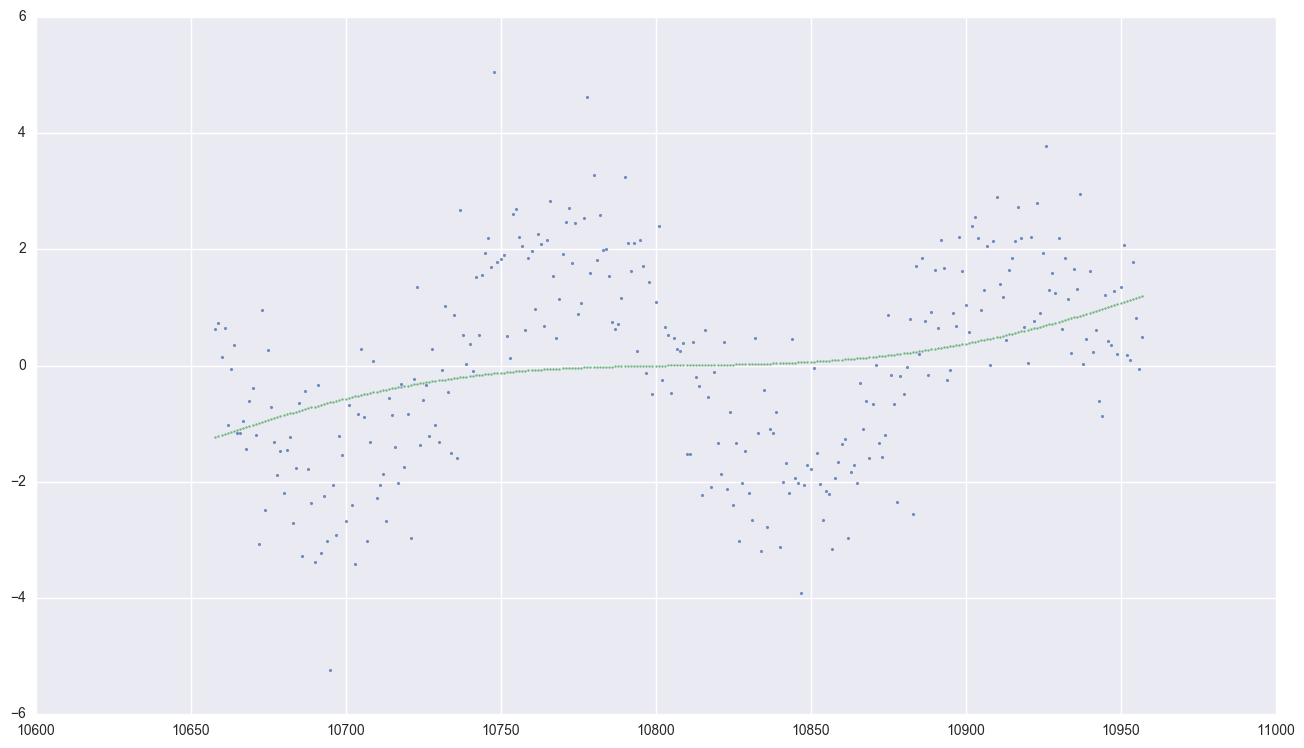

In [38]:
plt.figure(figsize=(16, 9))
sns.regplot(x=ts, y=ys, fit_reg=False, scatter_kws={"s": 5})
sns.regplot(x=ts, y=ps, fit_reg=False, scatter_kws={"s": 3})